In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import calendar
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
df=pd.concat([train,test])

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.shape

(2919, 81)

In [11]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
null_var_per=df.isnull().sum()/df.shape[0]*100

In [13]:
null_var_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [14]:
null_above_50=null_var_per[null_var_per>50]

In [15]:
null_above_50

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [16]:
df.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'],inplace=True)

In [17]:
null_above_20_and_below_50=null_var_per[(null_var_per>20)&(null_var_per<51)]

In [18]:
null_above_20_and_below_50

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [19]:
null_above_0_below_20=null_var_per[(null_var_per>0)&(null_var_per<21)]

In [20]:
null_above_0_below_20

MSZoning         0.137033
LotFrontage     16.649538
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
SaleType         0.034258
dtype: float64

In [21]:
cat_var=df.select_dtypes(include='O').columns

In [22]:
cat_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
cat_miss_val=[var for var in cat_var if null_var_per[var]>0]

In [24]:
cat_miss_val

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [25]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

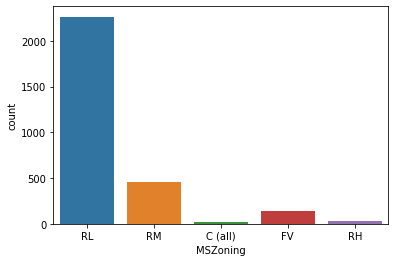

In [26]:
sns.countplot(df['MSZoning'])

In [27]:
MsZoning='RL'
df['MSZoning'].replace(np.nan,MsZoning,inplace=True)
df['MSZoning'].isnull().sum()

0

In [28]:
df['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [29]:
df.shape

(2919, 76)

In [30]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Utilities', ylabel='count'>

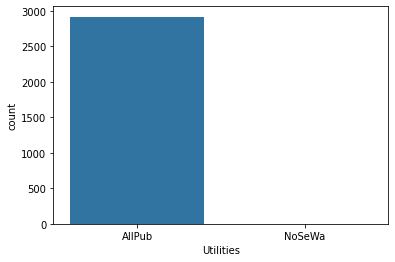

In [31]:
sns.countplot(df['Utilities'])

In [32]:
utilities='NoSeWa'
df['Utilities'].replace(np.nan,utilities,inplace=True)
df['Utilities'].isnull().sum()

0

In [33]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       3
Name: Utilities, dtype: int64

In [34]:
exter=['Exterior1st','Exterior2nd']
for values in exter:
    print('the values of :',df[values].value_counts())

the values of : VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
the values of : VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


In [35]:
exerterior='Stone'
for feat in exter:
    df[feat].replace(np.nan,exerterior,inplace=True)
df[exter].isnull().sum()

Exterior1st    0
Exterior2nd    0
dtype: int64

In [36]:
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [37]:
masVnrType='None'
df['MasVnrType'].replace(np.nan,masVnrType,inplace=True)
df['MasVnrType'].isnull().sum()

0

In [38]:
bstment=['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2']

In [39]:
for feat in bstment:
    print('value counts',df[feat].value_counts())

value counts TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
value counts TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
value counts No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
value counts Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
value counts Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [40]:
cat_bstm='Na'
for feat in bstment:
    df[feat].replace(np.nan,cat_bstm,inplace=True)
df[bstment].isnull().sum()    

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [41]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [42]:
electrical='Mix'
df['Electrical'].replace(np.nan,electrical,inplace=True)
df['Electrical'].isnull().sum()

0

##### handling 
'KitchenQual',
 'Functional',
 'FireplaceQu',

In [43]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [44]:
kitchenQual='Fa'
df['KitchenQual'].replace(np.nan,kitchenQual,inplace=True)
df['KitchenQual'].isnull().sum()

0

In [45]:
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [46]:
functional='Sev'
df['Functional'].replace(np.nan,functional,inplace=True)
df['Functional'].isnull().sum()

0

In [47]:
df['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [48]:
fireplaceQu='Na'
df['FireplaceQu'].replace(np.nan,fireplaceQu,inplace=True)
df['FireplaceQu'].isnull().sum()

0

In [49]:
garage_var=['GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',]

In [50]:
for var in garage_var:
    print('values count',df[var].value_counts())

values count Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
values count Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
values count TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
values count TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64


In [51]:
garageType='Attchd'
df['GarageType'].replace(np.nan,garageType,inplace=True)
df['GarageType'].isnull().sum()

0

In [52]:
garageFinish='Unf'
df['GarageFinish'].replace(np.nan,garageFinish,inplace=True)
df['GarageFinish'].isnull().sum()

0

In [53]:
qual_cond=['GarageQual',
 'GarageCond']

In [54]:
other='TA'
for feat in qual_cond:
    df[feat].replace(np.nan,other,inplace=True)
df[qual_cond].isnull().sum()    

GarageQual    0
GarageCond    0
dtype: int64

In [55]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [56]:
saleType='WD'
df['SaleType'].replace(np.nan,saleType,inplace=True)
df['SaleType'].isnull().sum()

0

## handling numerical variables

In [57]:
num_var=df.select_dtypes(include=['int64','float64']).columns
num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [58]:
num_miss_var=[var for var in num_var if null_var_per[var]>0]
num_miss_var

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

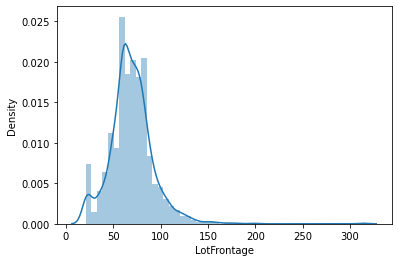

In [59]:
sns.distplot(df['LotFrontage'])

In [60]:
mean_lotfr=df['LotFrontage'].mean()
df['LotFrontage'].replace(np.nan,mean_lotfr,inplace=True)
df["LotFrontage"].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

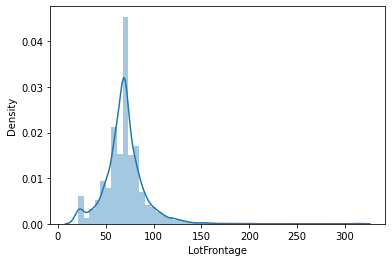

In [61]:
sns.distplot(df['LotFrontage'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

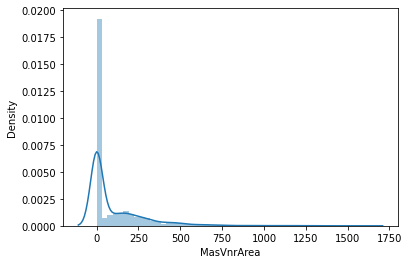

In [62]:
sns.distplot(df['MasVnrArea'])

In [63]:
median_masarea=df['MasVnrArea'].median()
df['MasVnrArea'].replace(np.nan,median_masarea,inplace=True)
df['MasVnrArea'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

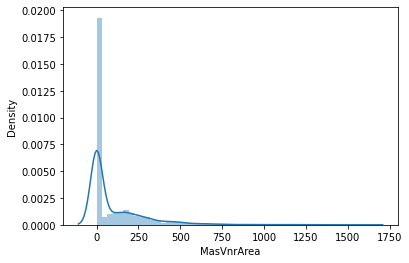

In [64]:
sns.distplot(df['MasVnrArea'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

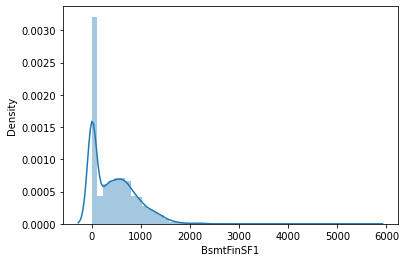

In [65]:
sns.distplot(df['BsmtFinSF1'])

In [66]:
bsmtFinSF1=df['BsmtFinSF1'].median()
df['BsmtFinSF1'].replace(np.nan,bsmtFinSF1,inplace=True)
df['BsmtFinSF1'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

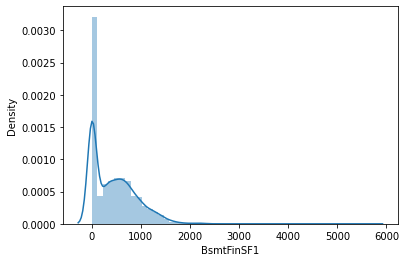

In [67]:
sns.distplot(df['BsmtFinSF1'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

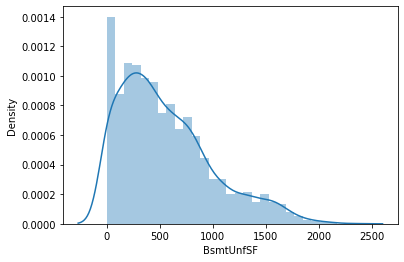

In [68]:
sns.distplot(df['BsmtUnfSF'])

In [69]:
bsmtFinSF=df['BsmtUnfSF'].median()
df['BsmtUnfSF'].replace(np.nan,bsmtFinSF,inplace=True)
df['BsmtUnfSF'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

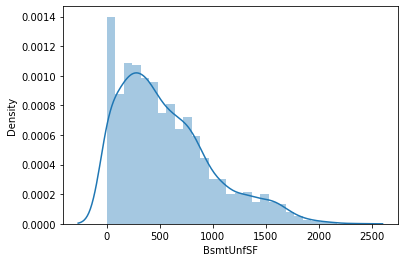

In [70]:
sns.distplot(df['BsmtUnfSF'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

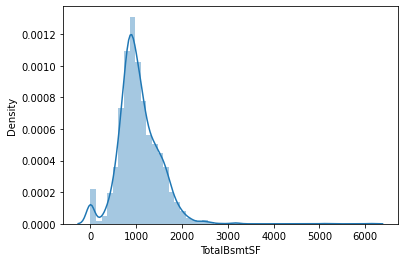

In [71]:
sns.distplot(df['TotalBsmtSF'])

In [72]:
totalBsmtSF=df['TotalBsmtSF'].mean()
df['TotalBsmtSF'].replace(np.nan,totalBsmtSF,inplace=True)
df['TotalBsmtSF'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

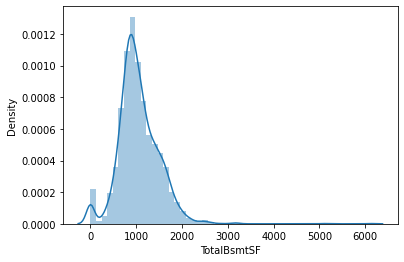

In [73]:
sns.distplot(df['TotalBsmtSF'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFullBath', ylabel='Density'>

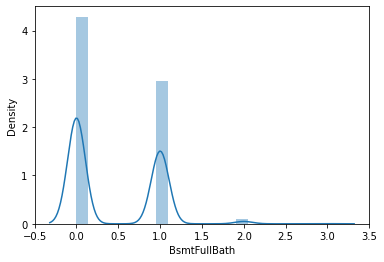

In [74]:
sns.distplot(df['BsmtFullBath'])

In [75]:
bsmtFullBath=df['BsmtFullBath'].median()
df['BsmtFullBath'].replace(np.nan,bsmtFullBath,inplace=True)
df['BsmtFullBath'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFullBath', ylabel='Density'>

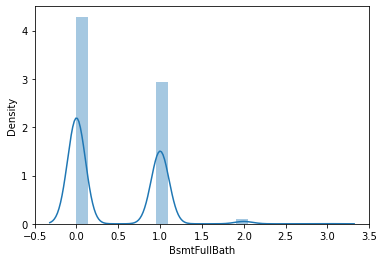

In [76]:
sns.distplot(df['BsmtFullBath'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtHalfBath', ylabel='Density'>

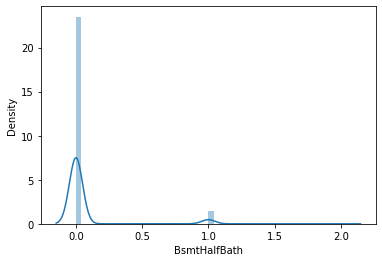

In [77]:
sns.distplot(df['BsmtHalfBath'])

In [78]:
bsmtHalfBath=df['BsmtHalfBath'].median()
df['BsmtHalfBath'].replace(np.nan,bsmtHalfBath,inplace=True)
df['BsmtHalfBath'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtHalfBath', ylabel='Density'>

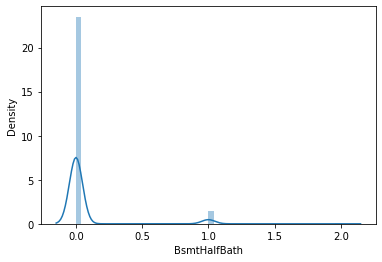

In [79]:
sns.distplot(df['BsmtHalfBath'])

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

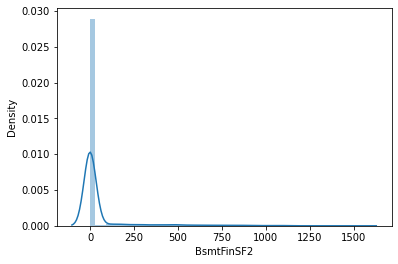

In [80]:
sns.distplot(df['BsmtFinSF2'])

In [81]:
bsmtFinSF2=df['BsmtFinSF2'].median()
df['BsmtFinSF2'].replace(np.nan,bsmtFinSF2,inplace=True)
df['BsmtFinSF2'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

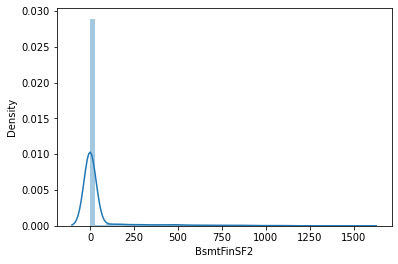

In [82]:
sns.distplot(df['BsmtFinSF2'])

'GarageYrBlt',
 'GarageCars',
 'GarageArea'

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

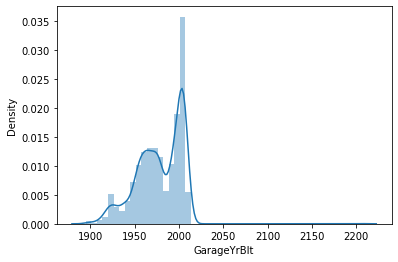

In [83]:
sns.distplot(df['GarageYrBlt'])

In [84]:
garageYrBlt=df['GarageYrBlt'].median()
df['GarageYrBlt'].replace(np.nan,garageYrBlt,inplace=True)
df['GarageYrBlt'].isnull().sum()

0

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

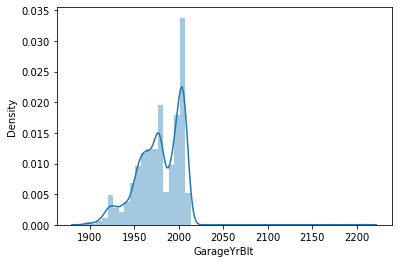

In [85]:
sns.distplot(df['GarageYrBlt'])

In [86]:
garageCars=df['GarageCars'].median()
df['GarageCars'].replace(np.nan,garageCars,inplace=True)
df['GarageCars'].isnull().sum()

0

In [87]:
garageArea=df['GarageArea'].mean()
df['GarageArea'].replace(np.nan,garageArea,inplace=True)
df['GarageArea'].isnull().sum()

0

In [88]:
df.isnull().sum().sum()

1459

### convert numerical features to catogerical 

In [89]:
numerical_feat=['MSSubClass','YrSold','YearBuilt','MoSold','YearRemodAdd','GarageYrBlt']

In [90]:
for feat in numerical_feat:
    print(f'{feat}:dtypes {df[feat].dtype}')

MSSubClass:dtypes int64
YrSold:dtypes int64
YearBuilt:dtypes int64
MoSold:dtypes int64
YearRemodAdd:dtypes int64
GarageYrBlt:dtypes float64


In [91]:
df[numerical_feat].head()

,MSSubClass,YrSold,YearBuilt,MoSold,YearRemodAdd,GarageYrBlt
0,60,2008,2003,2,2003,2003.0
1,20,2007,1976,5,1976,1976.0
2,60,2008,2001,9,2002,2001.0
3,70,2006,1915,2,1970,1998.0
4,60,2008,2000,12,2000,2000.0


In [92]:
df['MoSold']=df['MoSold'].apply(lambda x:calendar.month_abbr[x])

In [93]:
for feat in numerical_feat:
    df[numerical_feat]=df[numerical_feat].astype(str)

In [94]:
for feat in numerical_feat:
    print(f'{feat} dtype {df[feat].dtype}')

MSSubClass dtype object
YrSold dtype object
YearBuilt dtype object
MoSold dtype object
YearRemodAdd dtype object
GarageYrBlt dtype object


### covert nomianal categorical features into numerical

In [95]:
object_var=df.select_dtypes(include='O').columns
print('the lenght of object features :',len(object_var))
object_var


the lenght of object features : 45


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [96]:
df['SaleType'].value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [97]:
df['MSZoning']=df['MSZoning'].astype(CategoricalDtype(categories=['RL','RP','RM','RH','I','FV','A','C (all)'],ordered=True)).cat.codes
df['Street']=df['Street'].astype(CategoricalDtype(categories=['Grvl','Pave'],ordered=True)).cat.codes
df['LotShape']=df['LotShape'].astype(CategoricalDtype(categories=['IR3','IR2','IR1','Reg'],ordered=True)).cat.codes
df['LandContour']=df['LandContour'].astype(CategoricalDtype(categories=['Low','HLS','Bnk','Lvl'],ordered=True)).cat.codes
df['Utilities']=df['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True)).cat.codes
df['LotConfig']=df['LotConfig'].astype(CategoricalDtype(categories=['CulDSac','Inside','Corner','FR2','FR3'],ordered=True)).cat.codes
df['LandSlope']=df['LandSlope'].astype(CategoricalDtype(categories=['Sev','Mod','Gtl'],ordered=True)).cat.codes
df['Condition1']=df['Condition1'].astype(CategoricalDtype(categories=['RRAe','RRNe','PosA','PosN','RRAn','RRNn','Norm','Feedr','Artery'],ordered=True)).cat.codes
df['Condition2']=df['Condition2'].astype(CategoricalDtype(categories=['RRAe','RRNe','PosA','PosN','RRAn','RRNn','Norm','Feedr','Artery'],ordered=True)).cat.codes
df['BldgType']=df['BldgType'].astype(CategoricalDtype(categories=['Twnhs','TwnhsE','Duplex','2fmCon','1Fam'],ordered=True)).cat.codes
df['HouseStyle']=df['HouseStyle'].astype(CategoricalDtype(categories=['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],ordered=True)).cat.codes
df['RoofStyle']=df['RoofStyle'].astype(CategoricalDtype(categories=['Shed','Mansard','Hip','Gambrel','Gable','Flat'],ordered=True)).cat.codes
df['RoofMatl']=df['RoofMatl'].astype(CategoricalDtype(categories=['WdShngl','WdShake','Tar&Grv','Roll','Metal','Membran','CompShg','ClyTile'],ordered=True)).cat.codes
df['MasVnrType']=df['MasVnrType'].astype(CategoricalDtype(categories=['None','Stone','CBlock','BrkFace','BrkCmn'],ordered=True)).cat.codes
df['ExterQual']=df['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['ExterCond']=df['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['BsmtQual']=df['BsmtQual'].astype(CategoricalDtype(categories=['Na','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['BsmtCond']=df['BsmtCond'].astype(CategoricalDtype(categories=['Na','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['BsmtExposure']=df['BsmtExposure'].astype(CategoricalDtype(categories=['Na','No','Mn','Av','Gd'],ordered=True)).cat.codes
df['BsmtFinType1']=df['BsmtFinType1'].astype(CategoricalDtype(categories=['Na','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df['BsmtFinType2']=df['BsmtFinType2'].astype(CategoricalDtype(categories=['Na','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df['HeatingQC']=df['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['CentralAir']=df['CentralAir'].astype(CategoricalDtype(categories=['N','Y'],ordered=True)).cat.codes
df['Electrical']=df['Electrical'].astype(CategoricalDtype(categories=['Mix','FuseP','FuseF','FuseA','SBrkr'],ordered=True)).cat.codes
df['KitchenQual']=df['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['FireplaceQu']=df['FireplaceQu'].astype(CategoricalDtype(categories=['Na','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['GarageFinish']=df['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df['GarageQual']=df['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['GarageCond']=df['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df['PavedDrive']=df['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes


In [98]:
df['MasVnrType'].value_counts()

0    1766
3     879
1     249
4      25
Name: MasVnrType, dtype: int64

### one hot encoding 

In [99]:
df_new=df.copy()

In [100]:
df_new.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,1,3,3,3,1,2,CollgCr,6,6,4,3,7,5,2003,2003,4,6,VinylSd,VinylSd,3,196.0,3,2,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,4,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,0,Attchd,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,Feb,2008,WD,Normal,208500.0
1,20,0,80.0,9600,1,3,3,3,3,2,Veenker,7,6,4,0,6,8,1976,1976,4,6,MetalSd,MetalSd,0,0.0,2,2,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,4,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,May,2007,WD,Normal,181500.0


In [101]:
all_obj_feat=df_new.select_dtypes(include='O').columns.tolist()
print('the lenght of object features are:',len(all_obj_feat))
print('the name of object feat are :',all_obj_feat)

the lenght of object features are: 15
the name of object feat are : ['MSSubClass', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Functional', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [102]:
df_new=pd.get_dummies(df_new,columns=all_obj_feat,prefix=all_obj_feat,drop_first=True)

In [103]:
df_new.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemodAdd_1991,YearRemodAdd_1992,YearRemodAdd_1993,YearRemodAdd_1994,YearRemodAdd_1995,YearRemodAdd_1996,YearRemodAdd_1997,YearRemodAdd_1998,YearRemodAd

In [104]:
df_new.shape

(2919, 457)

### split data for testing and training

In [105]:
len_train=train.shape[0]
len_train

1460

In [106]:
X_train=df_new[:len_train].drop('SalePrice',axis=1)
y_train=df_new['SalePrice'][:len_train]
X_test=df_new[len_train:].drop('SalePrice',axis=1)

In [107]:
X_train.shape

(1460, 456)

In [108]:
y_train.shape

(1460,)

In [109]:
X_test.shape

(1459, 456)

## feature scaling

In [110]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# sc.fit(X_train)

In [111]:
# X_train=sc.transform(X_train)
# X_test=sc.transform(X_test)


## training for machine learning algo

In [112]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [113]:
svr=SVR(kernel='linear')
Lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
Gbr=GradientBoostingRegressor()
Rfr=RandomForestRegressor(n_estimators=4)
xgb=XGBRegressor()

In [114]:
models={"a":["LinearRegression",Lr],
        "b":["SVR",svr],
        "c":["SGDRegressor",sgdr],
        "d":["KNeighborsRegressor",knr],
        "e":["GaussianProcessRegressor",gpr],
        "f":["DecisionTreeRegressor",dtr],
        "g":["GradientBoostingRegressor",Gbr],
        "h":["RandomForestRegressor",Rfr],
        "i":["XGBRegressor",xgb]}

In [115]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score



In [116]:
def test_model(model,X_train=X_train,y_train=y_train):
    cv=KFold(n_splits=5,shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [117]:
models_score=[]
for model in models:
    print('Training model :',models[model][0])
    score=test_model(models[model][1],X_train,y_train)
    print('score of model :',score)
    models_score.append([models[model][0],score[0]])

Training model : LinearRegression
score of model : [-7872873958374.514]
Training model : SVR
score of model : [0.669526520108888]
Training model : SGDRegressor
score of model : [-1.15168718550675e+25]
Training model : KNeighborsRegressor
score of model : [0.6526812119145542]
Training model : GaussianProcessRegressor
score of model : [-5.285915306824944]
Training model : DecisionTreeRegressor
score of model : [0.734538400592524]
Training model : GradientBoostingRegressor
score of model : [0.8698455093764655]
Training model : RandomForestRegressor
score of model : [0.7839295830603336]
Training model : XGBRegressor
score of model : [0.8500435956016821]
